# Session 6 exercises

These are sample answers for the in-class exercises in Session 6 of PHAS0030.  You should make sure that you can do these yourself! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 3. The classical wave equation

### Question 1

In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation using simple finite difference 
    approach.  Assumes periodic boundary conditions.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Constant (c dt/dx)
    Output:
    theta at time t_{n+1} = (n+1)*dt """
    N = np.size(theta_n)
    theta_np1 = np.zeros(N)
    theta_np1 = 2.0*(1-r*r)*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1) + np.roll(theta_n,-1))
    return theta_np1

### Question 2(a)

In [3]:
wavelength = 1 #m
wavevector = 2*np.pi/wavelength
frequency = 1 # Hz
ang_freq = 2*np.pi*frequency
speed = wavelength*frequency

# Define number of points and factor r
N = 20
r = 0.1
# Initialise
dx = wavelength/N
dt = r*dx/speed
q1_x = np.arange(0,3*wavelength,dx)


Text(0.5, 1.0, 'Wave propagation with r=0.1')

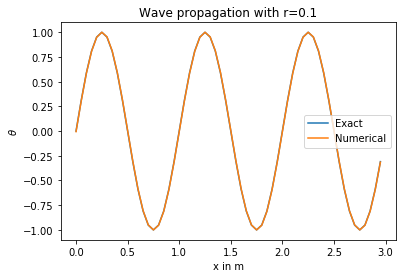

In [4]:
t = 0
theta_0 = np.sin(wavevector*q1_x - ang_freq*t)
t += dt
theta_1 = np.sin(wavevector*q1_x - ang_freq*t)
iters = 200
for n in range(iters):
    theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_0 = theta_1
    theta_1 = theta_next
plt.plot(q1_x,np.sin(wavevector*q1_x - ang_freq*dt*(iters)),label='Exact')
plt.plot(q1_x,theta_next,label='Numerical')
plt.legend()
plt.xlabel('x in m')
plt.ylabel(r'$\theta$')
plt.title('Wave propagation with r=0.1')

Text(0.5, 1.0, 'Error in wave propagation with r=0.1')

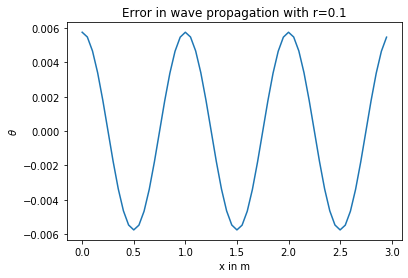

In [5]:
plt.plot(q1_x,np.sin(wavevector*q1_x - ang_freq*dt*(iters))-theta_next)
plt.xlabel('x in m')
plt.ylabel(r'$\theta$')
plt.title('Error in wave propagation with r=0.1')

These compare extremely well.  If we plot the difference (as above), it is less than 1%.

### Question 2b

Text(0.5, 1.0, 'Error in propagation with varying r')

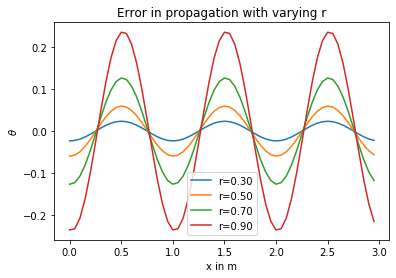

In [6]:
# Storage for Nt values of r
Nt = 4
store = np.zeros((Nt,len(q1_x)))
endt = np.zeros(Nt)
rvec = np.linspace(0.3,0.9,Nt)
# Iterate over values of r
for i, r in enumerate(rvec):
    # Initialise
    dt = r*dx/speed
    t = 0
    theta_0 = np.sin(wavevector*q1_x - ang_freq*t)
    t += dt
    theta_1 = np.sin(wavevector*q1_x - ang_freq*t)
    iters = 200
    for n in range(iters):
        theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
        theta_0 = theta_1
        theta_1 = theta_next
    # Store final waveform and time for comparison
    store[i,:] = np.copy(theta_next)
    endt[i] = iters*dt
for i in range(Nt):
    plt.plot(q1_x,store[i]-np.sin(wavevector*q1_x - ang_freq*endt[i]),label='r={0:4.2f}'.format(rvec[i]))
plt.legend()
plt.xlabel('x in m')
plt.ylabel(r'$\theta$')
plt.title('Error in propagation with varying r')

### Question 3

This time, I will use the figure-based method of plotting, and add a subplot at each iteration.

Text(0.5, 0.98, 'Comparing accuracy for varying N')

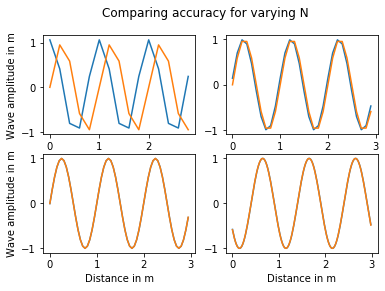

In [7]:
r = 0.1
graph = 1
fig_S3Q3 = plt.figure()
ax_S3Q3 = []
for N in (5,10,20,50):
    ax_S3Q3.append(fig_S3Q3.add_subplot(2,2,graph))
    # Initialise
    dx = wavelength/N
    q3_x = np.arange(0,3*wavelength,dx)
    dt = r*dx/speed
    t = 0
    theta_0 = np.sin(wavevector*q3_x - ang_freq*t)
    t += dt
    theta_1 = np.sin(wavevector*q3_x - ang_freq*t)
    iters = 200
    for n in range(iters):
        theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
        theta_0 = theta_1
        theta_1 = theta_next
    ax_S3Q3[graph-1].plot(q3_x,theta_next)
    ax_S3Q3[graph-1].plot(q3_x,np.sin(wavevector*q3_x - ang_freq*dt*iters))
    graph+=1
ax_S3Q3[0].set_ylabel("Wave amplitude in m")
ax_S3Q3[2].set_ylabel("Wave amplitude in m")
ax_S3Q3[2].set_xlabel("Distance in m")
ax_S3Q3[3].set_xlabel("Distance in m")
fig_S3Q3.suptitle("Comparing accuracy for varying N")

## 4. Two dimensions

### Question 1

In [8]:
def explicit_2D_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation using simple finite difference 
    approach.  Assumes periodic boundary conditions.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Constant (c dt/dx)
    Output:
    theta at time t_{n+1} = (n+1)*dt """
    theta_np1 = 2.0*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1,axis=0) - 
                                               2.0*theta_n + np.roll(theta_n,-1,axis=0) 
                                              ) + r*r*(np.roll(theta_n,1,axis=1) - 
                                               2.0*theta_n + np.roll(theta_n,-1,axis=1) )
    return theta_np1

### Question 2

In [9]:
# Define number of points
N = 100
# Initialise
dx = wavelength/N # Also dy
S4Q2_x = np.arange(0,3*wavelength,dx)
S4Q2_y = np.arange(0,3*wavelength,dx)
S4_x2d, S4_y2d = np.meshgrid(S4Q2_x,S4Q2_y)

### Question 3

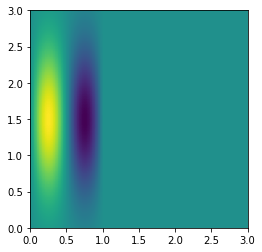

In [10]:
midy = 1.5*wavelength
sigma = 1.0
# Start with a sine wave in x, with Gaussian envelope in y
t = 0
theta_0 = np.sin(wavevector*S4_x2d - ang_freq*t)*np.exp(-(S4_y2d-midy)**2/sigma)
# Now zero beyond 1m
theta_0[:,N:] = 0.0
theta_0[:,0] = 0.0
plt.imshow(theta_0,extent=(0,3,0,3))

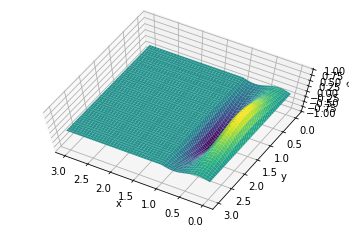

In [11]:
fig_3d1 = plt.figure()
ax3d1 = fig_3d1.add_subplot(111,projection='3d')
ax3d1.plot_surface(S4_x2d,S4_y2d,theta_0,cmap='viridis')
ax3d1.set_xlabel('x')
ax3d1.set_ylabel('y')
ax3d1.set_zlabel(r'$\theta$')
ax3d1.view_init(70, 120)

### Question 4

In [12]:
r = 0.2
dt = r*dx/speed
t += dt
theta_1 = np.sin(wavevector*S4_x2d - ang_freq*t)*np.exp(-(S4_y2d-midy)**2/sigma)
# Confine starting wave to left hand side
theta_0[:,N:] = 0.0
theta_1[:,N:] = 0.0
theta_1[:,0] = 0.0
# Boundary conditions at top and bottom
theta_0[0,:] = 0.0
theta_0[3*N-1,:] = 0.0
theta_1[0,:] = 0.0
theta_1[3*N-1,:] = 0.0
iters = 100
for n in range(iters):
    # Update
    theta_next = explicit_2D_wave_eq_update(theta_1,theta_0,r)
    # Boundary conditions: hard walls at top & bottom
    theta_next[0,:] = 0.0
    theta_next[3*N-1,:] = 0.0
    # Update
    theta_0 = theta_1
    theta_1 = theta_next

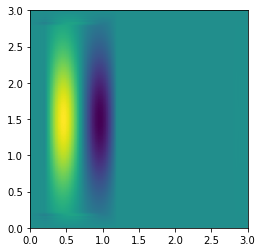

In [13]:
plt.imshow(theta_next,extent=(0,3,0,3))

Notice how there is some small artefact near the top and bottom; this must come from the boundary conditions and the initial wave not quite being zero near the edges.

### Question 5

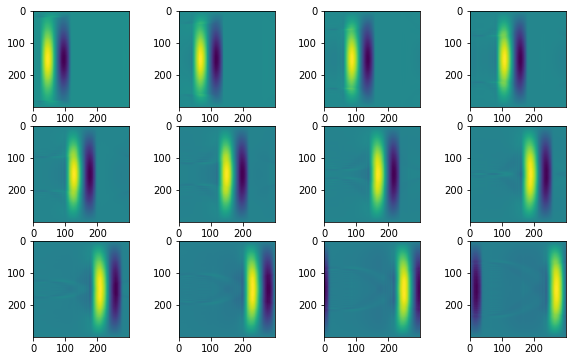

In [14]:
iters = 1200
figS4Q5 = plt.figure(figsize=(10,6))
index = 1
for n in range(iters):
    # Update
    theta_next = explicit_2D_wave_eq_update(theta_1,theta_0,r)
    # Boundary conditions: hard walls at top & bottom
    theta_next[0,:] = 0.0
    theta_next[3*N-1,:] = 0.0
    # Update
    theta_0 = theta_1
    theta_1 = theta_next
    if n%100==0:
        ax = figS4Q5.add_subplot(3,4,index)
        ax.imshow(theta_next)
        index+=1

## 5. Time-dependent Schrodinger equation

### Question 1

In [15]:
Nx = 401
x = np.linspace(-100,100,Nx)
k = 1
sigma = 10.0
x0 = -75.0
psi0 = np.exp(1j*x)*np.exp(-(x-x0)**2/sigma**2)

Text(0.5, 1.0, 'Initial wavefunction')

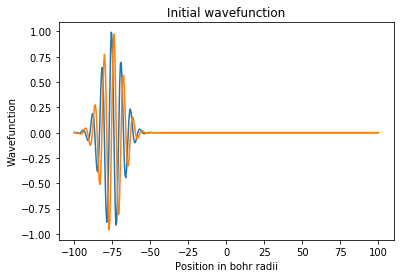

In [16]:
plt.plot(x,psi0.real)
plt.plot(x,psi0.imag)
plt.xlabel("Position in bohr radii")
plt.ylabel("Wavefunction")
plt.title("Initial wavefunction")

### Question 2

In [17]:
def calc_M(N,zeta,V,dt):
    """Calculate matrix M for Crank-Nicolson solution of TDSE
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N,2.0*(2.0+1j*zeta)) + 2j*dt*V
    offdiag = np.full(N-1,-1j*zeta)
    output = np.diag(maindiag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

In [18]:
def calc_N(N,zeta,V,dt):
    """Calculate matrix N for Crank-Nicolson solution of TDSE
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N,2.0*(2.0-1j*zeta)) - 2j*dt*V
    offdiag = np.full(N-1,1j*zeta)
    output = np.diag(maindiag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

### Question 3

In [19]:
V = np.zeros_like(x,dtype=complex)
dx = 0.5
dt = 0.1
zeta = dt/(dx*dx)
matM = calc_M(Nx,zeta,V,dt)
matN = calc_N(Nx,zeta,V,dt)
#print(matM)
#print(matN)
matMinv = np.linalg.inv(matM)
b = np.zeros(Nx,dtype=complex)
matMinvN = np.dot(matMinv,matN)
matMinvb = np.dot(matMinv,b) # Not strictly necessary !


### Question 4

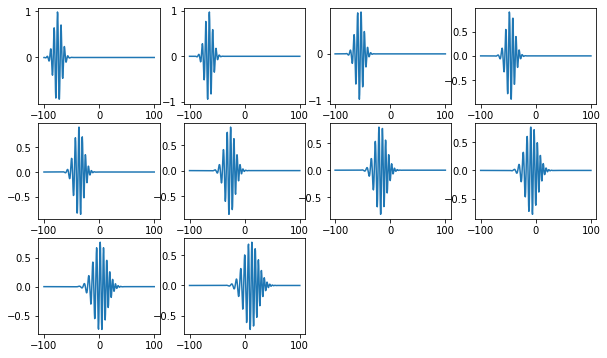

In [20]:
iters = 1000
psi0[0] = 0.0
psi0[-1] = 0.0
psi_this = np.copy(psi0)
figS5Q4 = plt.figure(figsize=(10,6))
index = 1
for i in range(iters):
    psi_next = matMinvb + np.dot(matMinvN,psi_this)
    psi_this = psi_next
    if i%100 == 0:
        ax = figS5Q4.add_subplot(3,4,index)
        ax.plot(x,psi_this.real)
        index += 1

Notice how the wavepacket spreads as it propagates: it is not an eigenfunction, and so different frequencies will travel at different speeds.

## 6. Time-independent Schrodinger equation

### Question 1

In [21]:
def simple_FD_update(psi0,psi1,V,E,dx,Nx):
    """Perform simple integration for TISE based on 
    second-order FD expansion of differential.
    
    Inputs:
    psi0   Value of wavefunction at first point
    psi1   Value of wavefunction at second point
    V      Array of potential values
    E      Energy
    dx     Spacing in x
    Nx     Number of points in x (inc 0 and 1)
    
    Output:
    psi         Array of values of wavefunction
    """
    psi = np.zeros(Nx,dtype=complex)
    psi[0] = psi0
    psi[1] = psi1
    for i in range(2,Nx):
        psi[i] = 2.0*psi[i-1] + 2*psi[i-1]*(V[i-1]-E)*dx*dx - psi[i-2]
    return psi

### Question 2

In [22]:
dx = 0.01
xmin = -5
xmax = 5
width = xmax - xmin
Nx = int((xmax-xmin)/dx)+1
x = np.linspace(xmin,xmax,Nx)
V = np.zeros_like(x,dtype=complex)
psi = np.zeros_like(x,dtype=complex)
psi0 = 0.0 + 0.0j
psi1 = 0.1 + 0.0j

### Question 3

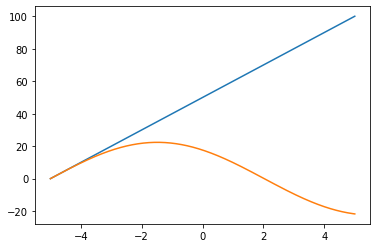

In [23]:
E0 = 0.0
E1 = 0.1
out0 = simple_FD_update(psi0,psi1,V,E0,dx,Nx)
out1 = simple_FD_update(psi0,psi1,V,E1,dx,Nx)
plt.plot(x,out0.real)
plt.plot(x,out1.real)

### Question 4

After  10  iterations, energy is  (0.049354881001508005+0j)


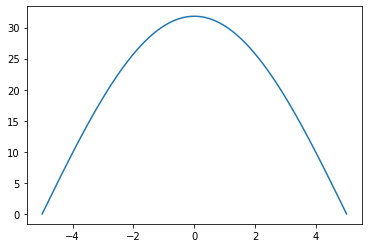

In [24]:
f0 = out0[-1]
f1 = out1[-1]
n = 0
tol = 1e-4
while abs(E1 - E0) > tol:
    n += 1
    # Calculate next point
    dE = E1 - E0
    df = f1 - f0
    Enext = E1 - f1 * dE / df
    # Update storage
    E0 = E1
    E1 = Enext
    f0 = f1
    f1 = simple_FD_update(psi0,psi1,V,E1,dx,Nx)[-1]
print("After ",n," iterations, energy is ",E0)
plt.plot(x,simple_FD_update(psi0,psi1,V,E0,dx,Nx).real)